## Fireworks and LangChain tools

We want to build some basic agents that ties a bunch of tools defined in LangChain together. We will use a Fireworks open source model, firefunction-v1, to power this tutorial. We will now define some LangChain tools and use that with ChatFireworks.

In [17]:
import { ChatFireworks } from "npm:@langchain/community/chat_models/fireworks";

In [31]:
/** Define the chat model */
const llm = new ChatFireworks({
  modelName: "accounts/fireworks/models/firefunction-v1",
  temperature: 0,
});

we will define three tools:
- search_answer, whenever we are not sure if the bot should answer the question or not
- get_stock_price, whenever we are feeling lucky and want to check what the stock price is
- generate_images, if we want to doodle something

In [54]:
import { z } from "zod";
import { StructuredTool } from "@langchain/core/tools";
import { formatToOpenAITool } from "@langchain/openai";

class SearchAnswer extends StructuredTool {
  name = "search_answer";
  
  description = "Search online for an answer only when you are not confident with the answer.";

  schema = z.object({
    query: z.string().describe("Query to use for the search engine."),
  });

  constructor() {
    super();
  }

  _call(input: z.infer<typeof this["schema"]>): Promise<string> {
    return Promise.resolve(JSON.stringify(input, null, 2));
  }
}

class GetStockPrice extends StructuredTool {
  name = "get_stock_price";
  
  description = "Get the stock price for a company.";

  schema = z.object({
    ticker: z.string().describe("Ticker for the company we are interested in."),
  });

  constructor() {
    super();
  }

  _call(input: z.infer<typeof this["schema"]>): Promise<string> {
    return Promise.resolve(JSON.stringify(input, null, 2));
  }
}

class GenerateImage extends StructuredTool {
  name = "generate_image";
  
  description = "Pass an image description to an AI to generate an image.";

  schema = z.object({
    detailed_description: z.string().describe("A very detailed description for the image."),
  });

  constructor() {
    super();
  }

  _call(input: z.infer<typeof this["schema"]>): Promise<string> {
    return Promise.resolve(JSON.stringify(input, null, 2));
  }
}

const searchTool = formatToOpenAITool(new SearchAnswer());
const stockTool = formatToOpenAITool(new GetStockPrice());
const imageTool = formatToOpenAITool(new GenerateImage());
const tools1 = [searchTool, stockTool, imageTool];

First, we will just ask some basic question for the model, and see if it knows to give an answer on the spot or not

In [55]:
const llmWithTool1 = llm.bind({
  tools: tools1,
});

const exampleQ = `What's Yosemite?`;

await llmWithTool1.invoke(exampleQ);

AIMessage {
  lc_serializable: true,
  lc_kwargs: {
    content: "Yosemite is a national park located in California, USA. It is known for its stunning natural beauty,"... 131 more characters,
    additional_kwargs: { function_call: undefined, tool_calls: undefined }
  },
  lc_namespace: [ "langchain_core", "messages" ],
  content: "Yosemite is a national park located in California, USA. It is known for its stunning natural beauty,"... 131 more characters,
  name: undefined,
  additional_kwargs: { function_call: undefined, tool_calls: undefined }
}

So for an easy question, the model just gave a reply on the spot.

Now let's ask the model something it definitely doesn't know. We just had the superbowl a few days ago, does the model knows to go to the search engine instead of hallucinate some random answer?

In [42]:
const llmWithTool1 = llm.bind({
  tools: tools1,
});

const exampleQ = `Which team won the superbowl in 2024?`;

await llmWithTool1.invoke(exampleQ);

AIMessage {
  lc_serializable: true,
  lc_kwargs: {
    content: "",
    additional_kwargs: {
      function_call: undefined,
      tool_calls: [
        {
          index: 0,
          id: "call_FJk8tEMn4XD1Fm7r35vTm0bl",
          type: "function",
          function: [Object]
        }
      ]
    }
  },
  lc_namespace: [ "langchain_core", "messages" ],
  content: "",
  name: undefined,
  additional_kwargs: {
    function_call: undefined,
    tool_calls: [
      {
        index: 0,
        id: "call_FJk8tEMn4XD1Fm7r35vTm0bl",
        type: "function",
        function: {
          name: "search_answer",
          arguments: '{"query": "Which team won the superbowl in 2024?"}'
        }
      }
    ]
  }
}

The model didn't hallucinate and went for the search engine instead! Pretty cool right?

Now we are feeling lucky, let's see if the model can give us some price movements for Nvidia.

In [43]:
const llmWithTool1 = llm.bind({
  tools: tools1,
});

const exampleQ = `What is the price of the Nvidia share now?`;

await llmWithTool1.invoke(exampleQ);

AIMessage {
  lc_serializable: true,
  lc_kwargs: {
    content: "",
    additional_kwargs: {
      function_call: undefined,
      tool_calls: [
        {
          index: 0,
          id: "call_8OCz14HkXRjyKLZxyAxzsKgP",
          type: "function",
          function: [Object]
        }
      ]
    }
  },
  lc_namespace: [ "langchain_core", "messages" ],
  content: "",
  name: undefined,
  additional_kwargs: {
    function_call: undefined,
    tool_calls: [
      {
        index: 0,
        id: "call_8OCz14HkXRjyKLZxyAxzsKgP",
        type: "function",
        function: { name: "get_stock_price", arguments: '{"ticker": "NVDA"}' }
      }
    ]
  }
}

Looks like the model knows Nvidia's ticker is NVDA, and also understand the concept of the ticker.

Now the final experiment, we want to make some doodles that are LangChain and Fireworks related, let's see how that goes.

In [56]:
const llmWithTool1 = llm.bind({
  tools: tools1,
});

const exampleQ = `Give me an image with a bird with fireworks in the background?`;

await llmWithTool1.invoke(exampleQ);

AIMessage {
  lc_serializable: true,
  lc_kwargs: {
    content: "",
    additional_kwargs: {
      function_call: undefined,
      tool_calls: [
        {
          index: 0,
          id: "call_5e24KyZOvUOGKXPTUEU4sQVc",
          type: "function",
          function: [Object]
        }
      ]
    }
  },
  lc_namespace: [ "langchain_core", "messages" ],
  content: "",
  name: undefined,
  additional_kwargs: {
    function_call: undefined,
    tool_calls: [
      {
        index: 0,
        id: "call_5e24KyZOvUOGKXPTUEU4sQVc",
        type: "function",
        function: {
          name: "generate_image",
          arguments: '{"detailed_description": "A bird with fireworks in the background."}'
        }
      }
    ]
  }
}

And here is the generated image with Fireworks SDXL API based on the query generated by the tool!

We would love to hear your feedback if you run into any issues with the model, or any integration issues with Fireworks and LangChain, so check out https://fireworks.ai, and ping us on Discord if you find any issues.

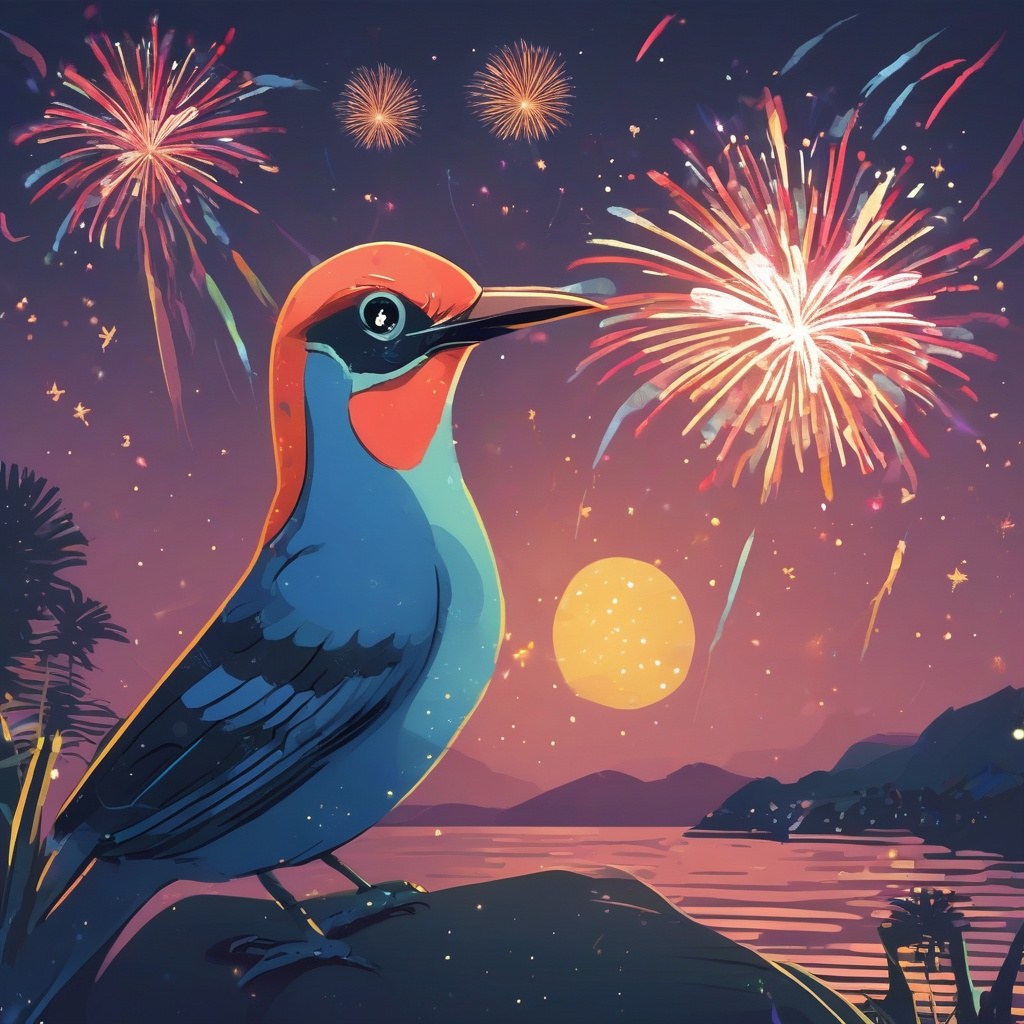